In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import urllib.robotparser as urobot
from urllib.request import urlopen
from pylab import rcParams
import csv
import math

%matplotlib inline

In [2]:
#Load both list_of_champs table & prospects'

df1 = pd.read_csv('../data/list_of_champs.csv')
df2 = pd.read_csv('../data/Top50_prospects.csv')
df2 = df2.dropna(axis=1)
df2

,Rank,Name,Weight Class,Record,Age,Fighting Style,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,1,Vadim Nemkov,Light Heavyweight,12-2,27,Wrestling,Bellator,Russia,Unknown,Prospect,9,2,1,1,0,1
1,2,Lance Palmer,Featherweight,22-3,32,Wrestling,PFL,USA,The Party,Prospect,1,8,13,0,1,2
2,3,A.J. McKee,Featherweight,17-0,25,Wrestling,Bellator,USA,Mercenary,Prospect,6,6,5,0,0,0
3,4,Natan Schulte,Lightweight,20-3-1,28,Jiu-Jitsu,PFL,Brazil,Russo,Prospect,4,9,7,1,1,1
4,5,Darrion Caldwell,Featherweight,15-4,32,Wrestling,Bellator,USA,The Wolf,Prospect,2,6,7,0,3,1
5,6,Jiri Prochazka,Light Heavyweight,27-3-1,27,Boxing,UFC,Czech republic,Denisa,Prospect,24,2,1,2,1,0
6,7,Valentin Moldavsky,Heavyweight,10-1,28,"Sambo, MMA",Bellator,Russia,Unknown,Prospect,1,3,6,0,0,1
7,8,Abdul-Aziz Abdulvakhabov,Lightweight,18-2,31,Wrestling,ACA,Russia,Lion,Prospect,7,6,5,0,0,2
8,9,Tomasz Narkun,Light Heavyweight,18-3,30,Jiu-Jitsu,KSW,Poland,Giraffe,Prospect,3,14,1,1,0,2
9,10,Pedro Carvalho,Featherweight,11-4,24,Jiu-Jitsu,Bellator,Portugal,The Game,Prospect,2,6,3,1,1,2


In [3]:
df2.dtypes

Rank                   int64
 Name                 object
 Weight Class         object
 Record               object
Age                    int64
Fighting Style        object
Company               object
Country               object
Nickname              object
Title Holder          object
win_by_KO_TKO          int64
win_by_submission      int64
win_by_decision        int64
loss_by_KO_TKO         int64
loss_by_submission     int64
loss_by_decision       int64
dtype: object

In [4]:
###Adjust df2 to match up with the list of champs before joining both tables###

df2 = pd.read_csv('../data/Top50_prospects.csv', usecols = [' Weight Class',
                                                            ' Name',
                                                            ' Record',
                                                            'Fighting Style',
                                                            'Country',
                                                            'Nickname',
                                                            'Title Holder',
                                                            'win_by_KO_TKO', 
                                                            'win_by_submission', 
                                                            'win_by_decision', 
                                                            'loss_by_KO_TKO', 
                                                            'loss_by_submission', 
                                                            'loss_by_decision'])

df2

,Name,Weight Class,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Vadim Nemkov,Light Heavyweight,12-2,Wrestling,Russia,Unknown,Prospect,9,2,1,1,0,1
1,Lance Palmer,Featherweight,22-3,Wrestling,USA,The Party,Prospect,1,8,13,0,1,2
2,A.J. McKee,Featherweight,17-0,Wrestling,USA,Mercenary,Prospect,6,6,5,0,0,0
3,Natan Schulte,Lightweight,20-3-1,Jiu-Jitsu,Brazil,Russo,Prospect,4,9,7,1,1,1
4,Darrion Caldwell,Featherweight,15-4,Wrestling,USA,The Wolf,Prospect,2,6,7,0,3,1
5,Jiri Prochazka,Light Heavyweight,27-3-1,Boxing,Czech republic,Denisa,Prospect,24,2,1,2,1,0
6,Valentin Moldavsky,Heavyweight,10-1,"Sambo, MMA",Russia,Unknown,Prospect,1,3,6,0,0,1
7,Abdul-Aziz Abdulvakhabov,Lightweight,18-2,Wrestling,Russia,Lion,Prospect,7,6,5,0,0,2
8,Tomasz Narkun,Light Heavyweight,18-3,Jiu-Jitsu,Poland,Giraffe,Prospect,3,14,1,1,0,2
9,Pedro Carvalho,Featherweight,11-4,Jiu-Jitsu,Portugal,The Game,Prospect,2,6,3,1,1,2


In [5]:
## Since df2 only showcases the top50 'MALE' MMA prospects, let's add a 'Gender' colummn to differenciate our Males and females athletes.

df2['Sex'] = 'Male'
df2

,Name,Weight Class,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Sex
0,Vadim Nemkov,Light Heavyweight,12-2,Wrestling,Russia,Unknown,Prospect,9,2,1,1,0,1,Male
1,Lance Palmer,Featherweight,22-3,Wrestling,USA,The Party,Prospect,1,8,13,0,1,2,Male
2,A.J. McKee,Featherweight,17-0,Wrestling,USA,Mercenary,Prospect,6,6,5,0,0,0,Male
3,Natan Schulte,Lightweight,20-3-1,Jiu-Jitsu,Brazil,Russo,Prospect,4,9,7,1,1,1,Male
4,Darrion Caldwell,Featherweight,15-4,Wrestling,USA,The Wolf,Prospect,2,6,7,0,3,1,Male
5,Jiri Prochazka,Light Heavyweight,27-3-1,Boxing,Czech republic,Denisa,Prospect,24,2,1,2,1,0,Male
6,Valentin Moldavsky,Heavyweight,10-1,"Sambo, MMA",Russia,Unknown,Prospect,1,3,6,0,0,1,Male
7,Abdul-Aziz Abdulvakhabov,Lightweight,18-2,Wrestling,Russia,Lion,Prospect,7,6,5,0,0,2,Male
8,Tomasz Narkun,Light Heavyweight,18-3,Jiu-Jitsu,Poland,Giraffe,Prospect,3,14,1,1,0,2,Male
9,Pedro Carvalho,Featherweight,11-4,Jiu-Jitsu,Portugal,The Game,Prospect,2,6,3,1,1,2,Male


In [6]:
## Now, let's merge both tables = combined list

df3 = pd.merge(df1, df2, how = 'outer')
df3

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Heavyweight\n,Mark Coleman\n,Male,16-10,Wrestling,USA,The Hammer,Former,7,5,4,3,5,2
1,Heavyweight\n,Maurice Smith\n,Male,14-14,Kickboxing,USA,Mo,Former,8,3,3,0,8,6
2,Heavyweight\n,Randy Couture\n,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
3,Heavyweight\n,Randy Couture\n,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
4,Heavyweight\n,Bas Rutten\n,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former,12,13,3,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Light Heavyweight,Nasrudin Nasrudinov,Male,9-0,Wrestling,Russia,Unknown,Prospect,4,1,4,0,0,0
165,Middleweight,Vladimir Mineev,Male,14-1-1,Kickboxing,Russia,Unknown,Prospect,9,3,2,0,0,1
166,Bantamweight,Patrick Mix,Male,13-1,"Wrestling, Jiu-Jitsu",USA,Patchy,Prospect,1,9,3,0,0,1
167,Lightweight,Soren Bak,Male,13-1,"Wrestling, Thai Boxing",Unknown,The True Viking,Prospect,2,6,5,1,0,0


In [7]:
df3.tail()

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
164,Light Heavyweight,Nasrudin Nasrudinov,Male,9-0,Wrestling,Russia,Unknown,Prospect,4,1,4,0,0,0
165,Middleweight,Vladimir Mineev,Male,14-1-1,Kickboxing,Russia,Unknown,Prospect,9,3,2,0,0,1
166,Bantamweight,Patrick Mix,Male,13-1,"Wrestling, Jiu-Jitsu",USA,Patchy,Prospect,1,9,3,0,0,1
167,Lightweight,Soren Bak,Male,13-1,"Wrestling, Thai Boxing",Unknown,The True Viking,Prospect,2,6,5,1,0,0
168,Lightweight,Khusein Khaliev,Male,20-2,Wrestling,Russia,Captain,Prospect,5,11,4,0,1,1


In [8]:
# Remove "\n" on both weight class, name columns

df3[' Weight Class'] = df3[' Weight Class'].str.strip()
df3.head()

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Heavyweight,Mark Coleman\n,Male,16-10,Wrestling,USA,The Hammer,Former,7,5,4,3,5,2
1,Heavyweight,Maurice Smith\n,Male,14-14,Kickboxing,USA,Mo,Former,8,3,3,0,8,6
2,Heavyweight,Randy Couture\n,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
3,Heavyweight,Randy Couture\n,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
4,Heavyweight,Bas Rutten\n,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former,12,13,3,0,3,1


In [9]:
df3[' Name'] = df3[' Name'].str.strip()
df3.head()

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Heavyweight,Mark Coleman,Male,16-10,Wrestling,USA,The Hammer,Former,7,5,4,3,5,2
1,Heavyweight,Maurice Smith,Male,14-14,Kickboxing,USA,Mo,Former,8,3,3,0,8,6
2,Heavyweight,Randy Couture,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
3,Heavyweight,Randy Couture,Male,19-11,Wrestling,USA,The Natural,Former,7,4,8,7,3,1
4,Heavyweight,Bas Rutten,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former,12,13,3,0,3,1


In [10]:
#Let's split the record column into two more descriptive 'Wins' & 'Losses' columns

split = lambda x:pd.Series([i for i in (x.split('-'))])

In [11]:
Record_df = df3[' Record'].apply(split)
Record_df

,0,1,2
0,16,10,NaN
1,14,14,NaN
2,19,11,NaN
3,19,11,NaN
4,28,4,NaN
...,...,...,...
164,9,0,NaN
165,14,1,1
166,13,1,NaN
167,13,1,NaN


In [12]:
Record_df.columns = ['Wins',
                     'Losses',
                     'Draws']

Record_df.head(2)

,Wins,Losses,Draws
0,16,10,NaN
1,14,14,NaN


In [13]:
Record_df = Record_df.drop(['Draws'], axis=1)

In [14]:
df4 = pd.concat([Record_df, df3], axis = 1)

In [15]:
# Reorder columns and remove extra space at the beginning of 'Weight Class' and 'Record' columns
df4.columns = ['Wins', 'Losses', 'Weight Class', 'Name', 'Sex', 'Record','Fighting Style', 'Country', 'Nickname', 'Title Holder', 'win_by_KO_TKO','win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision']

In [16]:
df4[['Name', 'Weight Class', 'Wins', 'Losses', 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder','win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision']]
df4 = df4[['Name', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO','win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision' , 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder']]
df4

,Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder
0,Mark Coleman,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former
1,Maurice Smith,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former
2,Randy Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former
3,Randy Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former
4,Bas Rutten,Heavyweight,28,4,12,13,3,0,3,1,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Nasrudin Nasrudinov,Light Heavyweight,9,0,4,1,4,0,0,0,Wrestling,Male,Russia,Unknown,Prospect
165,Vladimir Mineev,Middleweight,14,1,9,3,2,0,0,1,Kickboxing,Male,Russia,Unknown,Prospect
166,Patrick Mix,Bantamweight,13,1,1,9,3,0,0,1,"Wrestling, Jiu-Jitsu",Male,USA,Patchy,Prospect
167,Soren Bak,Lightweight,13,1,2,6,5,1,0,0,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect


In [17]:
#Split the name columns into first and last names

split = lambda x:pd.Series([i for i in (x.split(' '))])

In [18]:
Name_df = df4['Name'].apply(split)
Name_df

,0,1,2,3,4
0,Mark,Coleman,NaN,NaN,NaN
1,Maurice,Smith,NaN,NaN,NaN
2,Randy,Couture,NaN,NaN,NaN
3,Randy,Couture,NaN,NaN,NaN
4,Bas,Rutten,NaN,NaN,NaN
...,...,...,...,...,...
164,Nasrudin,Nasrudinov,NaN,NaN,NaN
165,Vladimir,Mineev,NaN,NaN,NaN
166,Patrick,Mix,NaN,NaN,NaN
167,Soren,Bak,NaN,NaN,NaN


In [19]:
Name_df.columns = ['First Name',
                   'Last Name',
                   'Interim Title Holder',
                   'n/a',
                   'n/a']

Name_df.head(2)

,First Name,Last Name,Interim Title Holder,n/a,n/a
0,Mark,Coleman,NaN,NaN,NaN
1,Maurice,Smith,NaN,NaN,NaN


In [20]:
Name_df = Name_df.drop(['n/a'], axis=1)
Name_df

,First Name,Last Name,Interim Title Holder
0,Mark,Coleman,NaN
1,Maurice,Smith,NaN
2,Randy,Couture,NaN
3,Randy,Couture,NaN
4,Bas,Rutten,NaN
...,...,...,...
164,Nasrudin,Nasrudinov,NaN
165,Vladimir,Mineev,NaN
166,Patrick,Mix,NaN
167,Soren,Bak,NaN


In [21]:
#remove "("

Name_df['Interim Title Holder'] = Name_df['Interim Title Holder'].str.strip('(')
Name_df.tail()

<ipython-input-21-c23243f857d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Name_df['Interim Title Holder'] = Name_df['Interim Title Holder'].str.strip('(')


,First Name,Last Name,Interim Title Holder
164,Nasrudin,Nasrudinov,NaN
165,Vladimir,Mineev,NaN
166,Patrick,Mix,NaN
167,Soren,Bak,NaN
168,Khusein,Khaliev,NaN


In [22]:
df5 = pd.concat([Name_df, df4], axis = 1)
df5

,First Name,Last Name,Interim Title Holder,Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder
0,Mark,Coleman,NaN,Mark Coleman,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former
1,Maurice,Smith,NaN,Maurice Smith,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former
2,Randy,Couture,NaN,Randy Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former
3,Randy,Couture,NaN,Randy Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former
4,Bas,Rutten,NaN,Bas Rutten,Heavyweight,28,4,12,13,3,0,3,1,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Nasrudin,Nasrudinov,NaN,Nasrudin Nasrudinov,Light Heavyweight,9,0,4,1,4,0,0,0,Wrestling,Male,Russia,Unknown,Prospect
165,Vladimir,Mineev,NaN,Vladimir Mineev,Middleweight,14,1,9,3,2,0,0,1,Kickboxing,Male,Russia,Unknown,Prospect
166,Patrick,Mix,NaN,Patrick Mix,Bantamweight,13,1,1,9,3,0,0,1,"Wrestling, Jiu-Jitsu",Male,USA,Patchy,Prospect
167,Soren,Bak,NaN,Soren Bak,Lightweight,13,1,2,6,5,1,0,0,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect


In [23]:
df5 = df5.drop(['Name'], axis=1)
df5

,First Name,Last Name,Interim Title Holder,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder
0,Mark,Coleman,NaN,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former
1,Maurice,Smith,NaN,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former
2,Randy,Couture,NaN,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former
3,Randy,Couture,NaN,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former
4,Bas,Rutten,NaN,Heavyweight,28,4,12,13,3,0,3,1,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Nasrudin,Nasrudinov,NaN,Light Heavyweight,9,0,4,1,4,0,0,0,Wrestling,Male,Russia,Unknown,Prospect
165,Vladimir,Mineev,NaN,Middleweight,14,1,9,3,2,0,0,1,Kickboxing,Male,Russia,Unknown,Prospect
166,Patrick,Mix,NaN,Bantamweight,13,1,1,9,3,0,0,1,"Wrestling, Jiu-Jitsu",Male,USA,Patchy,Prospect
167,Soren,Bak,NaN,Lightweight,13,1,2,6,5,1,0,0,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect


In [24]:
# Reorder & record columns
df5.columns = ['First Name', 'Last Name', 'Interim Title Holder', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Fighting Style', 'Sex', 'Country', 'Nickname','Title Holder']

In [25]:
df5[['First Name', 'Last Name', 'Interim Title Holder', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Fighting Style', 'Sex', 'Country', 'Nickname','Title Holder']]
df5 = df5[['First Name', 'Last Name', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Fighting Style', 'Sex', 'Country', 'Nickname','Title Holder', 'Interim Title Holder']]
df5

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
0,Mark,Coleman,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former,NaN
1,Maurice,Smith,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former,NaN
2,Randy,Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former,NaN
3,Randy,Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former,NaN
4,Bas,Rutten,Heavyweight,28,4,12,13,3,0,3,1,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Nasrudin,Nasrudinov,Light Heavyweight,9,0,4,1,4,0,0,0,Wrestling,Male,Russia,Unknown,Prospect,NaN
165,Vladimir,Mineev,Middleweight,14,1,9,3,2,0,0,1,Kickboxing,Male,Russia,Unknown,Prospect,NaN
166,Patrick,Mix,Bantamweight,13,1,1,9,3,0,0,1,"Wrestling, Jiu-Jitsu",Male,USA,Patchy,Prospect,NaN
167,Soren,Bak,Lightweight,13,1,2,6,5,1,0,0,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect,NaN


##Now that we combined the list of top 50 prospects (not signed w/ UFC yet) with the list of champions (and former champs), we'll load the table of recently drafted fighters to the UFC to complete our list of fighters for this analysis##
## This list includes female fighters compared to the top50 prospects' list ##

In [26]:
df6 = pd.read_csv('../data/2020_drafted.csv',encoding='cp1252') #use 'cp1252' since I'm opening the csv file from a windows machine
df6

,Name,Weight Class,Record,Sex,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Sergio Giglio,Featherweight,12-0,Male,UFC,Peru,Cachorro,Drafted,2,7,3,0,0,0
1,Melissa Gatto,Bantamweight,6-0,Female,UFC,Brazil,Unknown,Drafted,0,4,2,0,0,0
2,Bruno Silva,Middleweight,19-6,Male,UFC,Brazil,Blindado,Drafted,16,0,3,0,5,1
3,Giacomo Lemos,Heavyweight,6-0,Male,UFC,Brazil,Unknown,Drafted,5,1,0,0,0,0
4,Istela Nunes,Strawweight,6-1,Female,UFC,Brazil,Unknown,Drafted,2,0,4,0,1,0
5,Philip Rowe,Middleweight,7-2,Male,UFC,USA,The Fresh Prince,Drafted,3,4,0,1,0,1
6,Umar Nurmagomedov,Featherweight,12-0,Male,UFC,Russia,Unknown,Drafted,1,5,6,0,0,0
7,Aleksander Doskalchuk,Flyweight,10-1,Male,UFC,Ukraine,Unknown,Drafted,4,4,2,0,0,1
8,Manel Kape,Flyweight,15-4,Male,UFC,Angola,Prodígio,Drafted,9,5,1,0,2,2
9,Timo Feucht,Light Heavyweight,8-1,Male,UFC,Germany,Unknown,Drafted,4,4,0,0,1,0


In [27]:
#Let's clean it up and concatenate it with our master fighter list(df5)

split = lambda x:pd.Series([i for i in (x.split(' '))])
Name_df = df6[' Name'].apply(split)
Name_df

,0,1
0,Sergio,Giglio
1,Melissa,Gatto
2,Bruno,Silva
3,Giacomo,Lemos
4,Istela,Nunes
5,Philip,Rowe
6,Umar,Nurmagomedov
7,Aleksander,Doskalchuk
8,Manel,Kape
9,Timo,Feucht


In [28]:
Name_df.columns = ['First Name',
                   'Last Name']

Name_df.head(2)

,First Name,Last Name
0,Sergio,Giglio
1,Melissa,Gatto


In [29]:
df6 = pd.concat([Name_df, df6], axis = 1)
df6

,First Name,Last Name,Name,Weight Class,Record,Sex,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Sergio,Giglio,Sergio Giglio,Featherweight,12-0,Male,UFC,Peru,Cachorro,Drafted,2,7,3,0,0,0
1,Melissa,Gatto,Melissa Gatto,Bantamweight,6-0,Female,UFC,Brazil,Unknown,Drafted,0,4,2,0,0,0
2,Bruno,Silva,Bruno Silva,Middleweight,19-6,Male,UFC,Brazil,Blindado,Drafted,16,0,3,0,5,1
3,Giacomo,Lemos,Giacomo Lemos,Heavyweight,6-0,Male,UFC,Brazil,Unknown,Drafted,5,1,0,0,0,0
4,Istela,Nunes,Istela Nunes,Strawweight,6-1,Female,UFC,Brazil,Unknown,Drafted,2,0,4,0,1,0
5,Philip,Rowe,Philip Rowe,Middleweight,7-2,Male,UFC,USA,The Fresh Prince,Drafted,3,4,0,1,0,1
6,Umar,Nurmagomedov,Umar Nurmagomedov,Featherweight,12-0,Male,UFC,Russia,Unknown,Drafted,1,5,6,0,0,0
7,Aleksander,Doskalchuk,Aleksander Doskalchuk,Flyweight,10-1,Male,UFC,Ukraine,Unknown,Drafted,4,4,2,0,0,1
8,Manel,Kape,Manel Kape,Flyweight,15-4,Male,UFC,Angola,Prodígio,Drafted,9,5,1,0,2,2
9,Timo,Feucht,Timo Feucht,Light Heavyweight,8-1,Male,UFC,Germany,Unknown,Drafted,4,4,0,0,1,0


In [30]:
df6 = df6.drop([' Name'], axis=1)
df6

,First Name,Last Name,Weight Class,Record,Sex,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,Sergio,Giglio,Featherweight,12-0,Male,UFC,Peru,Cachorro,Drafted,2,7,3,0,0,0
1,Melissa,Gatto,Bantamweight,6-0,Female,UFC,Brazil,Unknown,Drafted,0,4,2,0,0,0
2,Bruno,Silva,Middleweight,19-6,Male,UFC,Brazil,Blindado,Drafted,16,0,3,0,5,1
3,Giacomo,Lemos,Heavyweight,6-0,Male,UFC,Brazil,Unknown,Drafted,5,1,0,0,0,0
4,Istela,Nunes,Strawweight,6-1,Female,UFC,Brazil,Unknown,Drafted,2,0,4,0,1,0
5,Philip,Rowe,Middleweight,7-2,Male,UFC,USA,The Fresh Prince,Drafted,3,4,0,1,0,1
6,Umar,Nurmagomedov,Featherweight,12-0,Male,UFC,Russia,Unknown,Drafted,1,5,6,0,0,0
7,Aleksander,Doskalchuk,Flyweight,10-1,Male,UFC,Ukraine,Unknown,Drafted,4,4,2,0,0,1
8,Manel,Kape,Flyweight,15-4,Male,UFC,Angola,Prodígio,Drafted,9,5,1,0,2,2
9,Timo,Feucht,Light Heavyweight,8-1,Male,UFC,Germany,Unknown,Drafted,4,4,0,0,1,0


In [31]:
split = lambda x:pd.Series([i for i in (x.split('-'))])
Record_df = df6[' Record'].apply(split)
Record_df

,0,1
0,12,0
1,6,0
2,19,6
3,6,0
4,6,1
5,7,2
6,12,0
7,10,1
8,15,4
9,8,1


In [32]:
Record_df.columns = ['Wins',
                     'Losses']
                     
Record_df.head(2)

,Wins,Losses
0,12,0
1,6,0


In [33]:
df6 = pd.concat([Record_df, df6], axis = 1)
df6

,Wins,Losses,First Name,Last Name,Weight Class,Record,Sex,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,12,0,Sergio,Giglio,Featherweight,12-0,Male,UFC,Peru,Cachorro,Drafted,2,7,3,0,0,0
1,6,0,Melissa,Gatto,Bantamweight,6-0,Female,UFC,Brazil,Unknown,Drafted,0,4,2,0,0,0
2,19,6,Bruno,Silva,Middleweight,19-6,Male,UFC,Brazil,Blindado,Drafted,16,0,3,0,5,1
3,6,0,Giacomo,Lemos,Heavyweight,6-0,Male,UFC,Brazil,Unknown,Drafted,5,1,0,0,0,0
4,6,1,Istela,Nunes,Strawweight,6-1,Female,UFC,Brazil,Unknown,Drafted,2,0,4,0,1,0
5,7,2,Philip,Rowe,Middleweight,7-2,Male,UFC,USA,The Fresh Prince,Drafted,3,4,0,1,0,1
6,12,0,Umar,Nurmagomedov,Featherweight,12-0,Male,UFC,Russia,Unknown,Drafted,1,5,6,0,0,0
7,10,1,Aleksander,Doskalchuk,Flyweight,10-1,Male,UFC,Ukraine,Unknown,Drafted,4,4,2,0,0,1
8,15,4,Manel,Kape,Flyweight,15-4,Male,UFC,Angola,Prodígio,Drafted,9,5,1,0,2,2
9,8,1,Timo,Feucht,Light Heavyweight,8-1,Male,UFC,Germany,Unknown,Drafted,4,4,0,0,1,0


In [34]:
df6 = df6.drop([' Record'], axis=1)
df6

,Wins,Losses,First Name,Last Name,Weight Class,Sex,Company,Country,Nickname,Title Holder,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision
0,12,0,Sergio,Giglio,Featherweight,Male,UFC,Peru,Cachorro,Drafted,2,7,3,0,0,0
1,6,0,Melissa,Gatto,Bantamweight,Female,UFC,Brazil,Unknown,Drafted,0,4,2,0,0,0
2,19,6,Bruno,Silva,Middleweight,Male,UFC,Brazil,Blindado,Drafted,16,0,3,0,5,1
3,6,0,Giacomo,Lemos,Heavyweight,Male,UFC,Brazil,Unknown,Drafted,5,1,0,0,0,0
4,6,1,Istela,Nunes,Strawweight,Female,UFC,Brazil,Unknown,Drafted,2,0,4,0,1,0
5,7,2,Philip,Rowe,Middleweight,Male,UFC,USA,The Fresh Prince,Drafted,3,4,0,1,0,1
6,12,0,Umar,Nurmagomedov,Featherweight,Male,UFC,Russia,Unknown,Drafted,1,5,6,0,0,0
7,10,1,Aleksander,Doskalchuk,Flyweight,Male,UFC,Ukraine,Unknown,Drafted,4,4,2,0,0,1
8,15,4,Manel,Kape,Flyweight,Male,UFC,Angola,Prodígio,Drafted,9,5,1,0,2,2
9,8,1,Timo,Feucht,Light Heavyweight,Male,UFC,Germany,Unknown,Drafted,4,4,0,0,1,0


In [35]:
# Reorder & record columns
df6.columns = ['Wins', 'Losses', 'First Name', 'Last Name', 'Weight Class', 'Sex', 'Company', 'Country', 'Nickname', 'Title Holder', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision']

In [36]:
df6[['Wins', 'Losses', 'First Name', 'Last Name', 'Weight Class', 'Sex', 'Company', 'Country', 'Nickname', 'Title Holder', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision']]
df6 = df6[['First Name', 'Last Name', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Sex', 'Company', 'Country', 'Nickname','Title Holder']]
df6

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Sex,Company,Country,Nickname,Title Holder
0,Sergio,Giglio,Featherweight,12,0,2,7,3,0,0,0,Male,UFC,Peru,Cachorro,Drafted
1,Melissa,Gatto,Bantamweight,6,0,0,4,2,0,0,0,Female,UFC,Brazil,Unknown,Drafted
2,Bruno,Silva,Middleweight,19,6,16,0,3,0,5,1,Male,UFC,Brazil,Blindado,Drafted
3,Giacomo,Lemos,Heavyweight,6,0,5,1,0,0,0,0,Male,UFC,Brazil,Unknown,Drafted
4,Istela,Nunes,Strawweight,6,1,2,0,4,0,1,0,Female,UFC,Brazil,Unknown,Drafted
5,Philip,Rowe,Middleweight,7,2,3,4,0,1,0,1,Male,UFC,USA,The Fresh Prince,Drafted
6,Umar,Nurmagomedov,Featherweight,12,0,1,5,6,0,0,0,Male,UFC,Russia,Unknown,Drafted
7,Aleksander,Doskalchuk,Flyweight,10,1,4,4,2,0,0,1,Male,UFC,Ukraine,Unknown,Drafted
8,Manel,Kape,Flyweight,15,4,9,5,1,0,2,2,Male,UFC,Angola,Prodígio,Drafted
9,Timo,Feucht,Light Heavyweight,8,1,4,4,0,0,1,0,Male,UFC,Germany,Unknown,Drafted


In [37]:
df6 = df6.drop(['Company'], axis=1)
df6

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Sex,Country,Nickname,Title Holder
0,Sergio,Giglio,Featherweight,12,0,2,7,3,0,0,0,Male,Peru,Cachorro,Drafted
1,Melissa,Gatto,Bantamweight,6,0,0,4,2,0,0,0,Female,Brazil,Unknown,Drafted
2,Bruno,Silva,Middleweight,19,6,16,0,3,0,5,1,Male,Brazil,Blindado,Drafted
3,Giacomo,Lemos,Heavyweight,6,0,5,1,0,0,0,0,Male,Brazil,Unknown,Drafted
4,Istela,Nunes,Strawweight,6,1,2,0,4,0,1,0,Female,Brazil,Unknown,Drafted
5,Philip,Rowe,Middleweight,7,2,3,4,0,1,0,1,Male,USA,The Fresh Prince,Drafted
6,Umar,Nurmagomedov,Featherweight,12,0,1,5,6,0,0,0,Male,Russia,Unknown,Drafted
7,Aleksander,Doskalchuk,Flyweight,10,1,4,4,2,0,0,1,Male,Ukraine,Unknown,Drafted
8,Manel,Kape,Flyweight,15,4,9,5,1,0,2,2,Male,Angola,Prodígio,Drafted
9,Timo,Feucht,Light Heavyweight,8,1,4,4,0,0,1,0,Male,Germany,Unknown,Drafted


In [38]:
## Now, let's merge df5 & df6 

df7 = pd.merge(df5, df6, how = 'outer')
df7

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
0,Mark,Coleman,Heavyweight,16,10,7,5,4,3,5,2,Wrestling,Male,USA,The Hammer,Former,NaN
1,Maurice,Smith,Heavyweight,14,14,8,3,3,0,8,6,Kickboxing,Male,USA,Mo,Former,NaN
2,Randy,Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former,NaN
3,Randy,Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former,NaN
4,Randy,Couture,Heavyweight,19,11,7,4,8,7,3,1,Wrestling,Male,USA,The Natural,Former,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Natalia,Silva,Flyweight,12,5,3,7,2,1,2,2,NaN,Female,Brazil,Unknown,Drafted,NaN
211,Dean,Barry,Lightweight,3,1,3,0,0,0,1,0,NaN,Male,Ireland,The Sniper,Drafted,NaN
212,Matheus,Pereira,Flyweight,15,2,4,5,6,2,0,0,NaN,Male,Brazil,Unknown,Drafted,NaN
213,Manon,Fiorot,Flyweight,5,1,4,0,1,0,0,1,NaN,Female,France,The Beast,Drafted,NaN


In [39]:
df7.dtypes

First Name              object
Last Name               object
Weight Class            object
Wins                    object
Losses                  object
win_by_KO_TKO            int64
win_by_submission        int64
win_by_decision          int64
loss_by_KO_TKO           int64
loss_by_submission       int64
loss_by_decision         int64
Fighting Style          object
Sex                     object
Country                 object
Nickname                object
Title Holder            object
Interim Title Holder    object
dtype: object

In [40]:
# Convert the wins, losses columns to integers

df7['Wins'] = df7.Wins.astype(int)
df7['Losses'] = df7.Wins.astype(int)

In [41]:
df7.dtypes

First Name              object
Last Name               object
Weight Class            object
Wins                     int32
Losses                   int32
win_by_KO_TKO            int64
win_by_submission        int64
win_by_decision          int64
loss_by_KO_TKO           int64
loss_by_submission       int64
loss_by_decision         int64
Fighting Style          object
Sex                     object
Country                 object
Nickname                object
Title Holder            object
Interim Title Holder    object
dtype: object

## Data Exploration ##

In [42]:
#I want to see how well each fighter performs by creating nine (9) analytical metrics:

df7['Total_Fights'] = df7['Wins'] + df7['Losses'] 
df7['Perc_Win'] = df7['Wins'] / df7['Total_Fights']*100   ##Winning percentage overall
df7['Perc_Loss'] = df7['Losses'] / df7['Total_Fights']*100 ##Losing percentage overall
df7['Perc_Win_KO'] = df7['win_by_KO_TKO'] / df7['Wins']*100   ##KO/TKO Winning percentage
df7['Perc_Win_Sub'] = df7['win_by_submission'] / df7['Wins']*100   ##Submission Winning percentage
df7['Perc_Win_Dec'] = df7['win_by_decision'] / df7['Wins']*100   ##Decision Winning percentage
df7['Perc_Loss_KO'] = df7['loss_by_KO_TKO'] / df7['Losses']*100   ##KO/TKO Losing percentage
df7['Perc_Loss_Sub'] = df7['loss_by_submission'] / df7['Losses']*100   ##Submission Losing percentage
df7['Perc_Loss_Dec'] = df7['loss_by_decision'] / df7['Losses']*100   ##Decision Losing percentage
df7

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,...,Interim Title Holder,Total_Fights,Perc_Win,Perc_Loss,Perc_Win_KO,Perc_Win_Sub,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec
0,Mark,Coleman,Heavyweight,16,16,7,5,4,3,5,...,NaN,32,50.0,50.0,43.750000,31.250000,25.000000,18.750000,31.250000,12.500000
1,Maurice,Smith,Heavyweight,14,14,8,3,3,0,8,...,NaN,28,50.0,50.0,57.142857,21.428571,21.428571,0.000000,57.142857,42.857143
2,Randy,Couture,Heavyweight,19,19,7,4,8,7,3,...,NaN,38,50.0,50.0,36.842105,21.052632,42.105263,36.842105,15.789474,5.263158
3,Randy,Couture,Heavyweight,19,19,7,4,8,7,3,...,NaN,38,50.0,50.0,36.842105,21.052632,42.105263,36.842105,15.789474,5.263158
4,Randy,Couture,Heavyweight,19,19,7,4,8,7,3,...,NaN,38,50.0,50.0,36.842105,21.052632,42.105263,36.842105,15.789474,5.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Natalia,Silva,Flyweight,12,12,3,7,2,1,2,...,NaN,24,50.0,50.0,25.000000,58.333333,16.666667,8.333333,16.666667,16.666667
211,Dean,Barry,Lightweight,3,3,3,0,0,0,1,...,NaN,6,50.0,50.0,100.000000,0.000000,0.000000,0.000000,33.333333,0.000000
212,Matheus,Pereira,Flyweight,15,15,4,5,6,2,0,...,NaN,30,50.0,50.0,26.666667,33.333333,40.000000,13.333333,0.000000,0.000000
213,Manon,Fiorot,Flyweight,5,5,4,0,1,0,0,...,NaN,10,50.0,50.0,80.000000,0.000000,20.000000,0.000000,0.000000,20.000000


In [43]:
df7['Perc_Win'] = df7.Perc_Win.astype(int)
df7['Perc_Loss'] = df7.Perc_Loss.astype(int)
df7['Total_Fights'] = df7.Total_Fights.astype(int)
df7['Perc_Win'] = df7.Perc_Win.astype(int)
df7['Perc_Loss'] = df7.Perc_Loss.astype(int)
df7['Perc_Win_KO'] = df7.Perc_Win_KO.astype(int)
df7['Perc_Win_Sub'] = df7.Perc_Win_Sub.astype(int)
df7['Perc_Win_Dec'] = df7.Perc_Win_Dec.astype(int)
df7['Perc_Loss_KO'] = df7.Perc_Loss_KO.astype(int)
df7['Perc_Loss_Sub'] = df7.Perc_Loss_Sub.astype(int)
df7['Perc_Loss_Dec'] = df7.Perc_Loss_Dec.astype(int)

In [44]:
df7.dtypes

First Name              object
Last Name               object
Weight Class            object
Wins                     int32
Losses                   int32
win_by_KO_TKO            int64
win_by_submission        int64
win_by_decision          int64
loss_by_KO_TKO           int64
loss_by_submission       int64
loss_by_decision         int64
Fighting Style          object
Sex                     object
Country                 object
Nickname                object
Title Holder            object
Interim Title Holder    object
Total_Fights             int32
Perc_Win                 int32
Perc_Loss                int32
Perc_Win_KO              int32
Perc_Win_Sub             int32
Perc_Win_Dec             int32
Perc_Loss_KO             int32
Perc_Loss_Sub            int32
Perc_Loss_Dec            int32
dtype: object

In [45]:
df7

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,...,Interim Title Holder,Total_Fights,Perc_Win,Perc_Loss,Perc_Win_KO,Perc_Win_Sub,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec
0,Mark,Coleman,Heavyweight,16,16,7,5,4,3,5,...,NaN,32,50,50,43,31,25,18,31,12
1,Maurice,Smith,Heavyweight,14,14,8,3,3,0,8,...,NaN,28,50,50,57,21,21,0,57,42
2,Randy,Couture,Heavyweight,19,19,7,4,8,7,3,...,NaN,38,50,50,36,21,42,36,15,5
3,Randy,Couture,Heavyweight,19,19,7,4,8,7,3,...,NaN,38,50,50,36,21,42,36,15,5
4,Randy,Couture,Heavyweight,19,19,7,4,8,7,3,...,NaN,38,50,50,36,21,42,36,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Natalia,Silva,Flyweight,12,12,3,7,2,1,2,...,NaN,24,50,50,25,58,16,8,16,16
211,Dean,Barry,Lightweight,3,3,3,0,0,0,1,...,NaN,6,50,50,100,0,0,0,33,0
212,Matheus,Pereira,Flyweight,15,15,4,5,6,2,0,...,NaN,30,50,50,26,33,40,13,0,0
213,Manon,Fiorot,Flyweight,5,5,4,0,1,0,0,...,NaN,10,50,50,80,0,20,0,0,20


In [46]:
df7[['First Name', 'Last Name', 'Weight Class', 'Wins', 'Losses', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Fighting Style', 'Sex', 'Country', 'Nickname','Title Holder', 'Interim Title Holder', 'Total_Fights', 'Perc_Win', 'Perc_Loss', 'Perc_Win_KO', 'Perc_Win_Sub', 'Perc_Win_Dec', 'Perc_Loss_KO', 'Perc_Loss_Sub', 'Perc_Loss_Dec']]

,First Name,Last Name,Weight Class,Wins,Losses,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,...,Interim Title Holder,Total_Fights,Perc_Win,Perc_Loss,Perc_Win_KO,Perc_Win_Sub,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec
0,Mark,Coleman,Heavyweight,16,16,7,5,4,3,5,...,NaN,32,50,50,43,31,25,18,31,12
1,Maurice,Smith,Heavyweight,14,14,8,3,3,0,8,...,NaN,28,50,50,57,21,21,0,57,42
2,Randy,Couture,Heavyweight,19,19,7,4,8,7,3,...,NaN,38,50,50,36,21,42,36,15,5
3,Randy,Couture,Heavyweight,19,19,7,4,8,7,3,...,NaN,38,50,50,36,21,42,36,15,5
4,Randy,Couture,Heavyweight,19,19,7,4,8,7,3,...,NaN,38,50,50,36,21,42,36,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Natalia,Silva,Flyweight,12,12,3,7,2,1,2,...,NaN,24,50,50,25,58,16,8,16,16
211,Dean,Barry,Lightweight,3,3,3,0,0,0,1,...,NaN,6,50,50,100,0,0,0,33,0
212,Matheus,Pereira,Flyweight,15,15,4,5,6,2,0,...,NaN,30,50,50,26,33,40,13,0,0
213,Manon,Fiorot,Flyweight,5,5,4,0,1,0,0,...,NaN,10,50,50,80,0,20,0,0,20


In [47]:
#Rename our new athletes master list

df7 = df7[['First Name', 'Last Name', 'Weight Class', 'Wins', 'Losses', 'Total_Fights', 'win_by_KO_TKO', 'win_by_submission', 'win_by_decision', 'loss_by_KO_TKO', 'loss_by_submission', 'loss_by_decision', 'Perc_Win', 'Perc_Loss', 'Perc_Win_KO', 'Perc_Win_Sub', 'Perc_Win_Dec', 'Perc_Loss_KO', 'Perc_Loss_Sub', 'Perc_Loss_Dec' , 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder', 'Interim Title Holder']]
df7

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
0,Mark,Coleman,Heavyweight,16,16,32,7,5,4,3,...,25,18,31,12,Wrestling,Male,USA,The Hammer,Former,NaN
1,Maurice,Smith,Heavyweight,14,14,28,8,3,3,0,...,21,0,57,42,Kickboxing,Male,USA,Mo,Former,NaN
2,Randy,Couture,Heavyweight,19,19,38,7,4,8,7,...,42,36,15,5,Wrestling,Male,USA,The Natural,Former,NaN
3,Randy,Couture,Heavyweight,19,19,38,7,4,8,7,...,42,36,15,5,Wrestling,Male,USA,The Natural,Former,NaN
4,Randy,Couture,Heavyweight,19,19,38,7,4,8,7,...,42,36,15,5,Wrestling,Male,USA,The Natural,Former,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Natalia,Silva,Flyweight,12,12,24,3,7,2,1,...,16,8,16,16,NaN,Female,Brazil,Unknown,Drafted,NaN
211,Dean,Barry,Lightweight,3,3,6,3,0,0,0,...,0,0,33,0,NaN,Male,Ireland,The Sniper,Drafted,NaN
212,Matheus,Pereira,Flyweight,15,15,30,4,5,6,2,...,40,13,0,0,NaN,Male,Brazil,Unknown,Drafted,NaN
213,Manon,Fiorot,Flyweight,5,5,10,4,0,1,0,...,20,0,0,20,NaN,Female,France,The Beast,Drafted,NaN


In [48]:
df7.describe(include=[np.number])

,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Perc_Win,Perc_Loss,Perc_Win_KO,Perc_Win_Sub,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.0,215.0,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,18.446512,18.446512,36.893023,7.948837,4.851163,5.632558,1.813953,1.097674,1.865116,50.0,50.0,42.781395,25.962791,30.181395,8.520930,5.488372,9.827907
std,8.565071,8.565071,17.130142,5.287279,4.364918,3.917354,2.350739,1.613247,2.321263,0.0,0.0,21.336284,19.583956,17.524872,10.483555,8.360376,11.443611
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,50.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.500000,12.500000,25.000000,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,50.0,50.0,26.500000,8.500000,20.000000,0.000000,0.000000,0.000000
50%,18.000000,18.000000,36.000000,7.000000,4.000000,5.000000,1.000000,1.000000,1.000000,50.0,50.0,42.000000,23.000000,29.000000,6.000000,3.000000,7.000000
75%,23.000000,23.000000,46.000000,10.000000,7.000000,8.000000,3.000000,1.000000,2.000000,50.0,50.0,56.000000,39.000000,41.500000,12.000000,7.000000,14.000000
max,54.000000,54.000000,108.000000,24.000000,25.000000,21.000000,11.000000,9.000000,17.000000,50.0,50.0,100.000000,90.000000,100.000000,52.000000,57.000000,75.000000


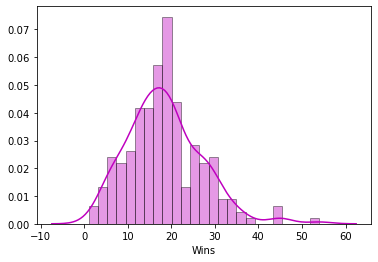

In [49]:
#distribution of wins

x = df7['Wins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

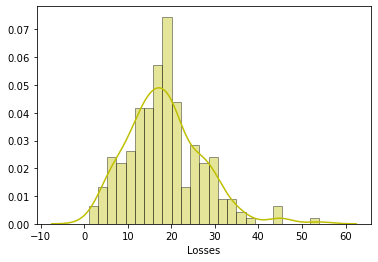

In [50]:
#distribution of losses in our dataframe

x = df7['Losses']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='y', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

# Now, We'll break up our master list in three sample groups: Former Champs, Current champs and Prospects (including newly drafted UFC athletes)

# The goal is to identify the trends and patterns among those samples 

In [51]:
#EDA- examine the current title holders with duplicated names showing either the ones who used to be Interim Champs or won the belt twice'

Current_champs = df7[df7['Title Holder'] == 'Current']
Current_champs

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
23,Stipe,Miocic,Heavyweight,20,20,40,15,0,5,2,...,25,10,0,5,Wresling,Male,USA,Unknown,Current,NaN
24,Stipe,Miocic,Heavyweight,20,20,40,15,0,5,2,...,25,10,0,5,Wresling,Male,USA,Unknown,Current,NaN
42,Jan,Blachowicz,Light Heavyweight,27,27,54,8,9,10,2,...,37,7,3,18,Jiu-Jitsu,Male,Poland,Prince of Cieszyn,Current,NaN
54,Israel,Adesanya,Middleweight,20,20,40,15,0,5,0,...,25,0,0,0,"Kickboxing, Boxing",Male,Nigeria,The Last Stylebender,Current,interim
55,Israel,Adesanya,Middleweight,20,20,40,15,0,5,0,...,25,0,0,0,"Kickboxing, Boxing",Male,NaN,The Last Stylebender,Current,NaN
70,Kamaru,Usman,Welterweight,17,17,34,7,1,9,0,...,52,0,5,0,Wrestling,Male,Nigeria,The Nigerian Nightmare,Current,NaN
81,Khabib,Nurmagomedov,Lightweight,29,29,58,8,11,10,0,...,34,0,0,0,Sambo,Male,Russia,The Eagle,Current,NaN
82,Khabib,Nurmagomedov,Lightweight,29,29,58,8,11,10,0,...,34,0,0,0,Sambo,Male,Russia,The Eagle,Current,NaN
92,Alexander,Volkanovski,Featherweight,22,22,44,11,3,8,1,...,36,4,0,0,Jiu-Jitsu,Male,Australia,The Great,Current,NaN
101,Petr,Yan,Bantamweight,15,15,30,7,1,7,0,...,46,0,0,6,"Boxing, Muay thai",Male,Russia,No Mercy,Current,NaN


In [52]:
Current_champs['Title Holder'].value_counts

<bound method IndexOpsMixin.value_counts of 23     Current
24     Current
42     Current
54     Current
55     Current
70     Current
81     Current
82     Current
92     Current
101    Current
104    Current
107    Current
111    Current
113    Current
118    Current
Name: Title Holder, dtype: object>

In [54]:
#Eventhough Amanda Nunes Holds the belt in both Featherweight and Bantamweight, We'll use her record once

Current_champs.drop([24,55,82,111])

,First Name,Last Name,Weight Class,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,...,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
23,Stipe,Miocic,Heavyweight,20,20,40,15,0,5,2,...,25,10,0,5,Wresling,Male,USA,Unknown,Current,NaN
42,Jan,Blachowicz,Light Heavyweight,27,27,54,8,9,10,2,...,37,7,3,18,Jiu-Jitsu,Male,Poland,Prince of Cieszyn,Current,NaN
54,Israel,Adesanya,Middleweight,20,20,40,15,0,5,0,...,25,0,0,0,"Kickboxing, Boxing",Male,Nigeria,The Last Stylebender,Current,interim
70,Kamaru,Usman,Welterweight,17,17,34,7,1,9,0,...,52,0,5,0,Wrestling,Male,Nigeria,The Nigerian Nightmare,Current,NaN
81,Khabib,Nurmagomedov,Lightweight,29,29,58,8,11,10,0,...,34,0,0,0,Sambo,Male,Russia,The Eagle,Current,NaN
92,Alexander,Volkanovski,Featherweight,22,22,44,11,3,8,1,...,36,4,0,0,Jiu-Jitsu,Male,Australia,The Great,Current,NaN
101,Petr,Yan,Bantamweight,15,15,30,7,1,7,0,...,46,0,0,6,"Boxing, Muay thai",Male,Russia,No Mercy,Current,NaN
104,Deiveson,Figueiredo,Flyweight,20,20,40,9,8,3,0,...,15,0,0,5,Jiu-Jitsu,Male,Brazil,Daico,Current,NaN
107,Amanda,Nunes,Featherweight,20,20,40,13,3,4,2,...,20,10,5,5,Jiu-Jitsu,Female,Brazil,The Lioness,Current,NaN
113,Valentina,Shevchenko,Flyweight,20,20,40,6,7,7,1,...,35,5,0,10,"Muay thai, Taekwondo",Female,Kyrgyzstan,Bullet,Current,NaN


In [55]:
Current_champs.describe(include=[np.number])

,Wins,Losses,Total_Fights,win_by_KO_TKO,win_by_submission,win_by_decision,loss_by_KO_TKO,loss_by_submission,loss_by_decision,Perc_Win,Perc_Loss,Perc_Win_KO,Perc_Win_Sub,Perc_Win_Dec,Perc_Loss_KO,Perc_Loss_Sub,Perc_Loss_Dec
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,21.333333,21.333333,42.666667,10.666667,4.266667,6.400000,0.800000,0.266667,0.933333,50.0,50.0,51.466667,17.933333,29.866667,3.733333,1.200000,4.200000
std,3.994043,3.994043,7.988086,3.373567,4.148436,2.472708,0.941124,0.457738,1.279881,0.0,0.0,18.799189,16.028843,10.446234,4.479583,2.111195,4.901895
min,15.000000,15.000000,30.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,50.0,50.0,27.000000,0.000000,15.000000,0.000000,0.000000,0.000000
25%,20.000000,20.000000,40.000000,8.000000,0.500000,4.500000,0.000000,0.000000,0.000000,50.0,50.0,35.500000,2.500000,22.500000,0.000000,0.000000,0.000000
50%,20.000000,20.000000,40.000000,10.000000,3.000000,5.000000,0.000000,0.000000,1.000000,50.0,50.0,47.000000,15.000000,25.000000,0.000000,0.000000,5.000000
75%,21.500000,21.500000,43.000000,14.000000,7.500000,8.500000,2.000000,0.500000,1.000000,50.0,50.0,70.000000,34.000000,35.500000,8.500000,1.500000,5.000000
max,29.000000,29.000000,58.000000,15.000000,11.000000,10.000000,2.000000,1.000000,5.000000,50.0,50.0,75.000000,40.000000,52.000000,10.000000,5.000000,18.000000


([<matplotlib.axis.XTick at 0x2216a59e7f0>], [Text(0, 0, 'First Name')])

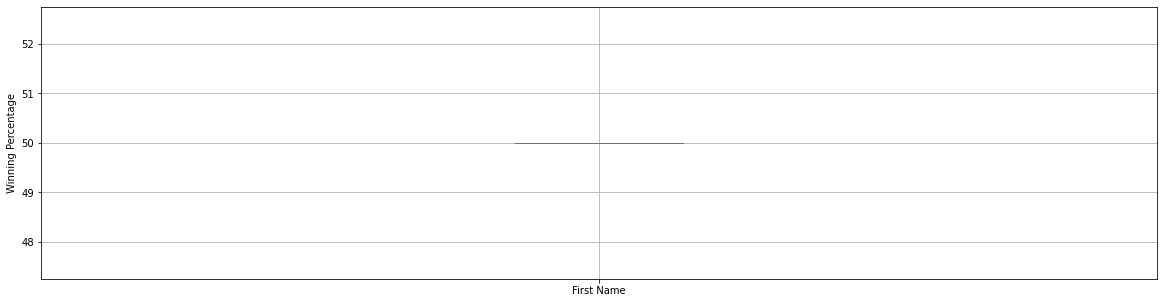

In [57]:
# Lets' Explore the %win among current champs 

rcParams['figure.figsize'] = 20,5

Current_champs.boxplot(column='Perc_Win')
plt.grid(True, axis='y')
plt.ylabel('Winning Percentage')
plt.xticks([1], ['First Name'])

In [ ]:
rcParams['figure.figsize'] = 15,5

Current_champs.boxplot(column='Perc_Loss')
plt.grid(True, axis='y')
plt.ylabel('Loss Percentage')
plt.xticks([1], ['First Name'])

In [ ]:
#Performance difference between Males and females champs "CURRENT ONLY"

m_fighters = Current_champs.loc[Current_champs['Sex']=='Male']['Wins']
f_fighters = Current_champs.loc[Current_champs['Sex']=='Female']['Wins']
sns.distplot(m_fighters, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
sns.distplot(f_fighters, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
plt.legend()

In [ ]:
#Average wins for both males and females is 20 wins, and losses 3.5 (females) and 1 (males)

gender_stats = Current_champs.groupby("Sex", as_index=True).describe()
print(gender_stats)

In [ ]:
division_stats = Current_champs.groupby("Weight Class", as_index=True).describe()
print(division_stats)

In [ ]:
#Let's look at the wins' distribution among current champions.

#Most current champions have at least 20 wins, the least is 15 wins

plt.hist (Current_champs['Wins'], bins = 10)
plt.xlabel('Nickname')
plt.ylabel('Wins');

In [ ]:
#Let's look at the losses' distribution among current champions.

#Most current champions have either 0 to 1 loss and maximum 8 losses

plt.hist (Current_champs['Losses'], bins = 10)
plt.xlabel('Losses')
plt.ylabel('Nickname');

In [ ]:
df7['success_ratio'] = df7['Wins'] / df7['Losses']
df7.head(3)

In [ ]:
#Let's look at the fighters with the "Top" success ratio ("0" losses)

df7 = df7.sort_values(by = 'success_ratio', ascending = False)
df7

In [ ]:
# Drill down to the prospects

Prospects = df7[df7['Title Holder'] == 'Prospect']
Prospects

In [ ]:
Prospects.describe(include=[np.number])

In [ ]:
Prospects = Prospects.sort_values(by = 'success_ratio', ascending = False)
Prospects

In [ ]:
plt.bar(Prospects['First Name'], Prospects['success_ratio'])
plt.xlabel('First Name')
plt.xticks(rotation=90)
plt.ylabel('success_ratio')
plt.title('Outlook of Prospects S/R')

plt.show()

In [ ]:
Prospects.boxplot(column = 'success_ratio', by='Country')
plt.ylabel('S/R')
plt.suptitle("")

In [ ]:
# Let's look at all the current champs with a positive success ratio 

df5['success_ratio'] >= 1 
df5['success_ratio']

In [ ]:
former_champs = df7[df7['Title Holder'] == 'Former']
former_champs

In [ ]:
former_champs.drop([39,41,73,61,62,63,103])

In [ ]:
former_champs.boxplot(column = 'success_ratio', by='Country')
plt.ylabel('S/R')
plt.suptitle("")

In [ ]:
former_champs['Fighting Style'].unique()

In [ ]:
#Most recurrent fighting style among former, current champs and prospects 

former_champs.groupby('Fighting Style')['First Name'].count().sort_values(ascending=False)

In [ ]:
Current_champs.groupby('Fighting Style')['First Name'].count().sort_values(ascending=False)

In [ ]:
Prospects.groupby('Fighting Style')['First Name'].count().sort_values(ascending=False)

In [ ]:
df7.groupby('Fighting Style')['First Name'].count().sort_values(ascending=False)

In [ ]:
#We need to associate the camps/coaches to their corresponding fighters
#Load Coaches' list

Camp = pd.read_csv('../data/Coaches_list.csv')
Camp